# Import Libraries

In [1]:
# Standard Libraries
import re  # For regular expressions in text preprocessing
import string  # For handling string operations (optional if unused)

# Data Handling
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Visualization
import seaborn as sns  # For static visualizations
import matplotlib.pyplot as plt  # For traditional plotting
import plotly.graph_objects as go  # For interactive visualizations
from wordcloud import WordCloud  # For generating word clouds

# Text Preprocessing
import nltk
from nltk.corpus import stopwords  # Stopwords for text cleaning
from nltk.tokenize import word_tokenize  # Tokenization for text preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer  # For TF-IDF feature extraction

# Machine Learning
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier  # Ensemble methods
from xgboost import XGBClassifier  # XGBoost model
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes model
from sklearn.metrics import (  # Evaluation metrics
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

# Deep Learning
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Padding sequences
from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenizing text data
from tensorflow.keras.models import Sequential  # Sequential model for DL
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Conv1D, GlobalMaxPooling1D  # DL layers

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Upload Dataset

In [2]:
# Load the dataset
true_news = pd.read_csv('/content/True.csv', engine='python', on_bad_lines='skip')
fake_news = pd.read_csv('/content/Fake.csv', engine='python', on_bad_lines='skip')

In [3]:
#True dataset
true_news.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [4]:
true_news.tail()

title  \
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  
21412  August 22, 2017   
21413  August 22, 2017   
21414  August 22, 2017   
21415  August 22, 2017   
21416  August 22, 2017

In [5]:
true_news.shape

(21417, 4)

In [6]:
true_news.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
true_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
true_news.duplicated().sum()

206

In [9]:
true_news = true_news.drop_duplicates()

In [10]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21211 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21211 non-null  object
 1   text     21211 non-null  object
 2   subject  21211 non-null  object
 3   date     21211 non-null  object
dtypes: object(4)
memory usage: 828.6+ KB


In [11]:
#Fake dataset
fake_news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [12]:
fake_news.tail()

title  \
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  
23476  January 16, 2016  
23477  January 16, 2016  
23478  January 15, 2016  
23479  January 14, 2016  
23480  January 12, 2016

In [ ]:
fake_news.shape

(23481, 4)

In [ ]:
fake_news.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
fake_news.duplicated().sum()

3

In [14]:
fake_news = fake_news.drop_duplicates()

In [15]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23478 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23478 non-null  object
 1   text     23478 non-null  object
 2   subject  23478 non-null  object
 3   date     23478 non-null  object
dtypes: object(4)
memory usage: 917.1+ KB


# Merging True and Fake DataFrames

In [16]:
# Add labels to indicate real and fake news
true_news['label'] = 1
fake_news['label'] = 0

In [17]:
# Concatenate both datasets
data = pd.concat([true_news, fake_news])

In [18]:
data.head(10)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   
5  White House, Congress prepare for talks on spe...   
6  Trump says Russia probe will be fair, but time...   
7  Factbox: Trump on Twitter (Dec 29) - Approval ...   
8         Trump on Twitter (Dec 28) - Global Warming   
9  Alabama official to certify Senator-elect Jone...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
5  WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...  politicsNews   
6  WEST PALM BEACH, Fla (Reuters) - President Don...  politicsNews   
7  The following statements were posted to the ve...  politicsNews   
8  The following statements were posted to the ve...  politicsNews   
9  WASHINGTON (Reuters) - Alabama Secretary of St...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1  
5  December 29, 2017       1  
6  December 29, 2017       1  
7  December 29, 2017       1  
8  December 29, 2017       1  
9  December 28, 2017       1

In [19]:
data.tail(10)

title  \
23471  Seven Iranians freed in the prisoner swap have...   
23472                      #Hashtag Hell & The Fake Left   
23473  Astroturfing: Journalist Reveals Brainwashing ...   
23474          The New American Century: An Era of Fraud   
23475  Hillary Clinton: ‘Israel First’ (and no peace ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
23471  21st Century Wire says This week, the historic...  Middle-east   
23472   By Dady Chery and Gilbert MercierAll writers ...  Middle-east   
23473  Vic Bishop Waking TimesOur reality is carefull...  Middle-east   
23474  Paul Craig RobertsIn the last years of the 20t...  Middle-east   
23475  Robert Fantina CounterpunchAlthough the United...  Middle-east   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  label  
23471  January 20, 2016      0  
23472  January 19, 2016      0  
23473  January 19, 2016      0  
23474  January 19, 2016      0  
23475  January 18, 2016      0  
23476  January 16, 2016      0  
23477  January 16, 2016      0  
23478  January 15, 2016      0  
23479  January 14, 2016      0  
23480  January 12, 2016      0

In [20]:
data.shape

(44689, 5)

In [21]:
data = data.sample(frac=1).reset_index(drop=True)

In [22]:
data

title  \
0      WATCH TRUMP DELIVER HILARIOUS Message To “Bern...   
1      ‘Who Appointed You to the Supreme Court?’: Sen...   
2      WATCH: MEGHAN MCCAIN RIPS Into Joy Behar For H...   
3      Putin says hopes to discuss better Russia-U.S....   
4      STEPHEN COLBERT’S RESPONSE To His Vulgar Remar...   
...                                                  ...   
44684  Putin-linked think tank drew up plan to sway 2...   
44685   Federal Court Bans US Navy From Using Sonar T...   
44686  Venezuela freeing some jailed activists, may e...   
44687  WATCH TREY GOWDY Crush The Lying Media During ...   
44688  RAPPER Who Met With Obama In White House To St...   

                                                    text       subject  \
0      President-elect @realDonaldTrump to protester:...      politics   
1      Former acting Attorney General Sally Yates was...     left-news   
2       The View  co-host, and rabid, liberal, activi...     left-news   
3      MOSCOW (Reuters) - Russian President Vladimir ...  politicsNews   
4      Johnny Carson must be rolling over in his grav...     left-news   
...                                                  ...           ...   
44684  WASHINGTON (Reuters) - A Russian government th...  politicsNews   
44685  On Friday a federal appeals court overturned a...          News   
44686  CARACAS (Reuters) - Venezuela s leftist govern...     worldnews   
44687  This is awesome! I watched the entire press co...      politics   
44688  A little over one year ago, radical activist, ...      politics   

                     date  label  
0            Dec 11, 2016      0  
1             May 9, 2017      0  
2             Dec 4, 2017      0  
3      December 23, 2016       1  
4             May 4, 2017      0  
...                   ...    ...  
44684     April 19, 2017       1  
44685       July 17, 2016      0  
44686  December 23, 2017       1  
44687        Jun 28, 2016      0  
44688        Mar 16, 2016      0  

[44689 rows x 5 columns]

In [23]:
data.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [24]:
data['label'].value_counts()

label
0    23478
1    21211
Name: count, dtype: int64

In [25]:
data['subject'].unique()

array(['politics', 'left-news', 'politicsNews', 'News', 'worldnews',
       'Government News', 'US_News', 'Middle-east'], dtype=object)

In [26]:
data['subject'].value_counts()

subject
politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [27]:
data['news'] = data['title'] + ' ' + data['text']
data

title  \
0      WATCH TRUMP DELIVER HILARIOUS Message To “Bern...   
1      ‘Who Appointed You to the Supreme Court?’: Sen...   
2      WATCH: MEGHAN MCCAIN RIPS Into Joy Behar For H...   
3      Putin says hopes to discuss better Russia-U.S....   
4      STEPHEN COLBERT’S RESPONSE To His Vulgar Remar...   
...                                                  ...   
44684  Putin-linked think tank drew up plan to sway 2...   
44685   Federal Court Bans US Navy From Using Sonar T...   
44686  Venezuela freeing some jailed activists, may e...   
44687  WATCH TREY GOWDY Crush The Lying Media During ...   
44688  RAPPER Who Met With Obama In White House To St...   

                                                    text       subject  \
0      President-elect @realDonaldTrump to protester:...      politics   
1      Former acting Attorney General Sally Yates was...     left-news   
2       The View  co-host, and rabid, liberal, activi...     left-news   
3      MOSCOW (Reuters) - Russian President Vladimir ...  politicsNews   
4      Johnny Carson must be rolling over in his grav...     left-news   
...                                                  ...           ...   
44684  WASHINGTON (Reuters) - A Russian government th...  politicsNews   
44685  On Friday a federal appeals court overturned a...          News   
44686  CARACAS (Reuters) - Venezuela s leftist govern...     worldnews   
44687  This is awesome! I watched the entire press co...      politics   
44688  A little over one year ago, radical activist, ...      politics   

                     date  label  \
0            Dec 11, 2016      0   
1             May 9, 2017      0   
2             Dec 4, 2017      0   
3      December 23, 2016       1   
4             May 4, 2017      0   
...                   ...    ...   
44684     April 19, 2017       1   
44685       July 17, 2016      0   
44686  December 23, 2017       1   
44687        Jun 28, 2016      0   
44688        Mar 16, 2016      0   

                                                    news  
0      WATCH TRUMP DELIVER HILARIOUS Message To “Bern...  
1      ‘Who Appointed You to the Supreme Court?’: Sen...  
2      WATCH: MEGHAN MCCAIN RIPS Into Joy Behar For H...  
3      Putin says hopes to discuss better Russia-U.S....  
4      STEPHEN COLBERT’S RESPONSE To His Vulgar Remar...  
...                                                  ...  
44684  Putin-linked think tank drew up plan to sway 2...  
44685   Federal Court Bans US Navy From Using Sonar T...  
44686  Venezuela freeing some jailed activists, may e...  
44687  WATCH TREY GOWDY Crush The Lying Media During ...  
44688  RAPPER Who Met With Obama In White House To St...  

[44689 rows x 6 columns]

In [28]:
data['news']

0        WATCH TRUMP DELIVER HILARIOUS Message To “Bern...
1        ‘Who Appointed You to the Supreme Court?’: Sen...
2        WATCH: MEGHAN MCCAIN RIPS Into Joy Behar For H...
3        Putin says hopes to discuss better Russia-U.S....
4        STEPHEN COLBERT’S RESPONSE To His Vulgar Remar...
                               ...                        
44684    Putin-linked think tank drew up plan to sway 2...
44685     Federal Court Bans US Navy From Using Sonar T...
44686    Venezuela freeing some jailed activists, may e...
44687    WATCH TREY GOWDY Crush The Lying Media During ...
44688    RAPPER Who Met With Obama In White House To St...
Name: news, Length: 44689, dtype: object

In [29]:
print(data['news'].head())

0    WATCH TRUMP DELIVER HILARIOUS Message To “Bern...
1    ‘Who Appointed You to the Supreme Court?’: Sen...
2    WATCH: MEGHAN MCCAIN RIPS Into Joy Behar For H...
3    Putin says hopes to discuss better Russia-U.S....
4    STEPHEN COLBERT’S RESPONSE To His Vulgar Remar...
Name: news, dtype: object


In [30]:
data_new = data.copy()

# Data Preprocessing

In [31]:
import nltk
# Download the required 'punkt_tab' resource
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [32]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# Ensure required resources are available
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize necessary components
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 3. Remove URLs
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)

    # 4. Remove numbers
    text = re.sub(r"\b[0-9]+\b\s*", "", text)

    # 5. Remove emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # 6. Remove stopwords
    tokens = word_tokenize(text)
    text = " ".join([word for word in tokens if word not in stop_words])

    # 7. Stemming
    text = " ".join([stemmer.stem(word) for word in word_tokenize(text)])

    # 8. Additional cleaning: remove single characters and extra spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Remove single characters
    text = re.sub(r'\s+', ' ', text).strip()     # Remove extra whitespace

    return text

# Applying the preprocessing function to the 'news' column
data_new['news'] = data_new['news'].apply(preprocess_text)

In [35]:
# Verify preprocessing results
print(data_new['news'].head())

0    watch trump deliv hilari messag “ berni suppor...
1    ‘ appoint suprem court ’ senat destroy yate de...
2    watch meghan mccain rip joy behar embarrass re...
3    putin say hope discuss better russiau tie trum...
4    stephen colbert ’ respons vulgar remark trump ...
Name: news, dtype: object


In [36]:
# Ask the user for input
user_input = input("Please enter a news text: ")

# Apply the preprocessing function
processed_text = preprocess_text(user_input)

# Display the processed text
print("\nProcessed Text:")
print(processed_text)

Please enter a news text: Breaking News! 🚀 Visit https://news.com for details. The event happened at 9 AM today.

Processed Text:
break news visit httpsnewscom detail event happen today


In [37]:
data_new = data_new[['news', 'label']]

In [38]:
data_new

news  label
0      watch trump deliv hilari messag “ berni suppor...      0
1      ‘ appoint suprem court ’ senat destroy yate de...      0
2      watch meghan mccain rip joy behar embarrass re...      0
3      putin say hope discuss better russiau tie trum...      1
4      stephen colbert ’ respons vulgar remark trump ...      0
...                                                  ...    ...
44684  putinlink think tank drew plan sway us elect d...      1
44685  feder court ban us navi use sonar harm marin m...      0
44686  venezuela free jail activist may expel diploma...      1
44687  watch trey gowdi crush lie media benghazi repo...      0
44688  rapper met obama white hous strateg tweet thre...      0

[44689 rows x 2 columns]

In [39]:
data_new.to_csv('cleaned_fake_news_data.csv')

# Exploratory Data Analysis (EDA)

<ipython-input-42-fbb7b0164334>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


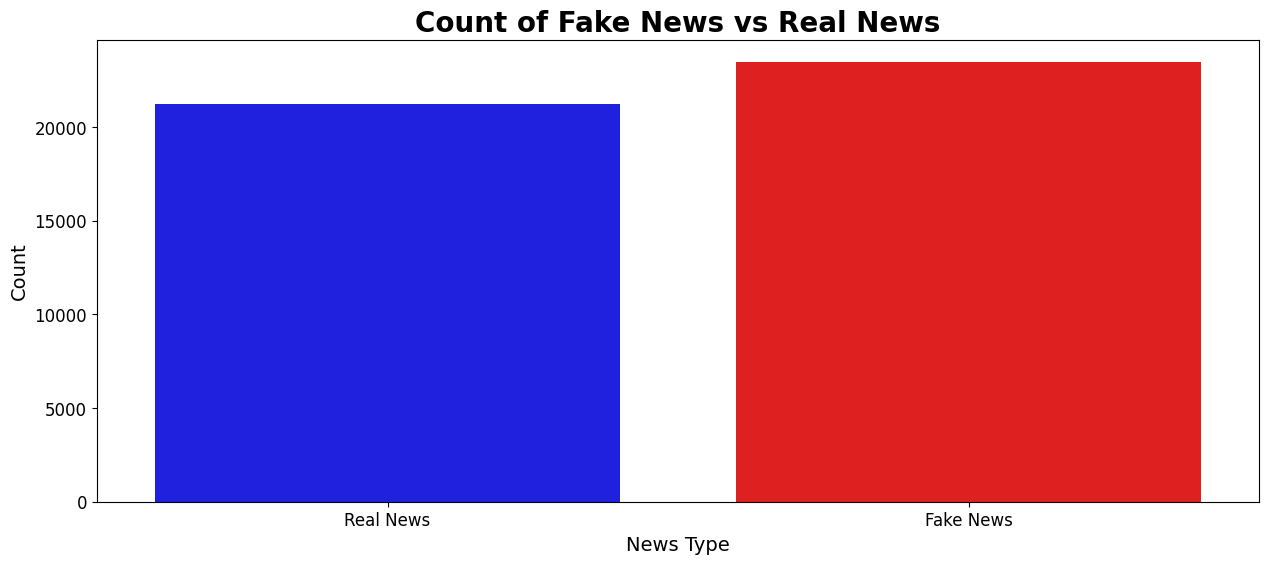

In [ ]:
#Visualize label distributions (True vs. Fake news counts)
custom_palette = {"Fake News": "red", "Real News": "blue"}

# Bar chart with colors explicitly mapped to labels
plt.figure(figsize=(15, 6))
sns.countplot(
    x='label',
    data=data.replace({'label': {0: 'Fake News', 1: 'Real News'}}),
    palette=custom_palette
)

# Add title and labels
plt.title("Count of Fake News vs Real News", fontsize=20, fontweight='bold')
plt.xlabel("News Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-43-02526221a446>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject', data=data, palette=colorful_palette)


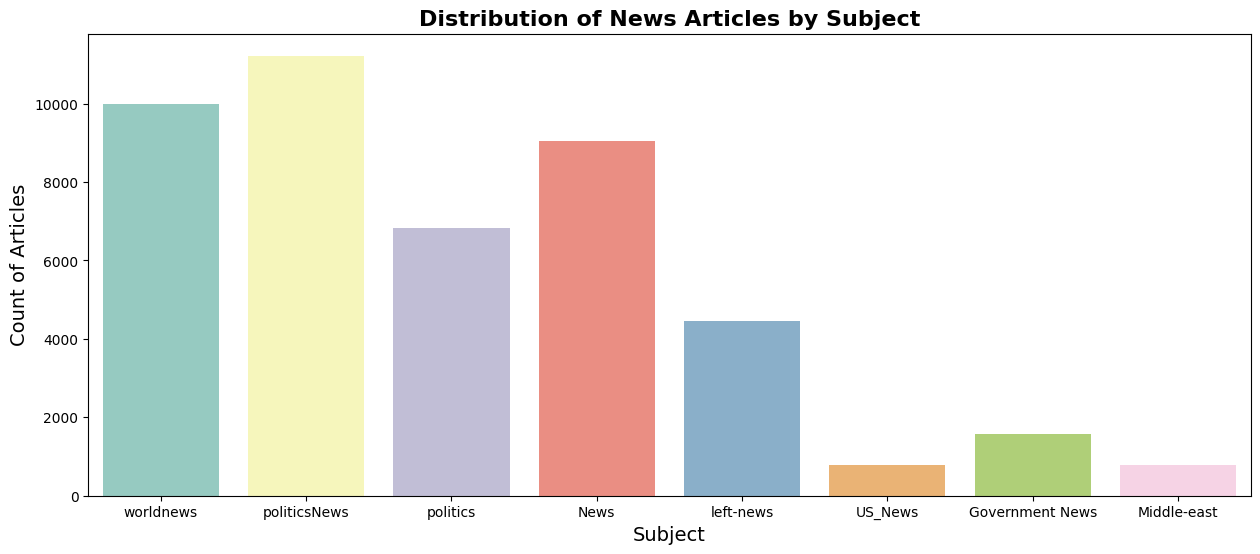

In [ ]:
# Explore subjects/categories
colorful_palette = sns.color_palette("Set3", n_colors=len(data['subject'].unique()))

# Bar chart for the distribution of news articles by subject
plt.figure(figsize=(15, 6))
sns.countplot(x='subject', data=data, palette=colorful_palette)

# Add title and labels
plt.title("Distribution of News Articles by Subject", fontsize=16, fontweight='bold')
plt.xlabel("Subject", fontsize=14)
plt.ylabel("Count of Articles", fontsize=14)

plt.show()

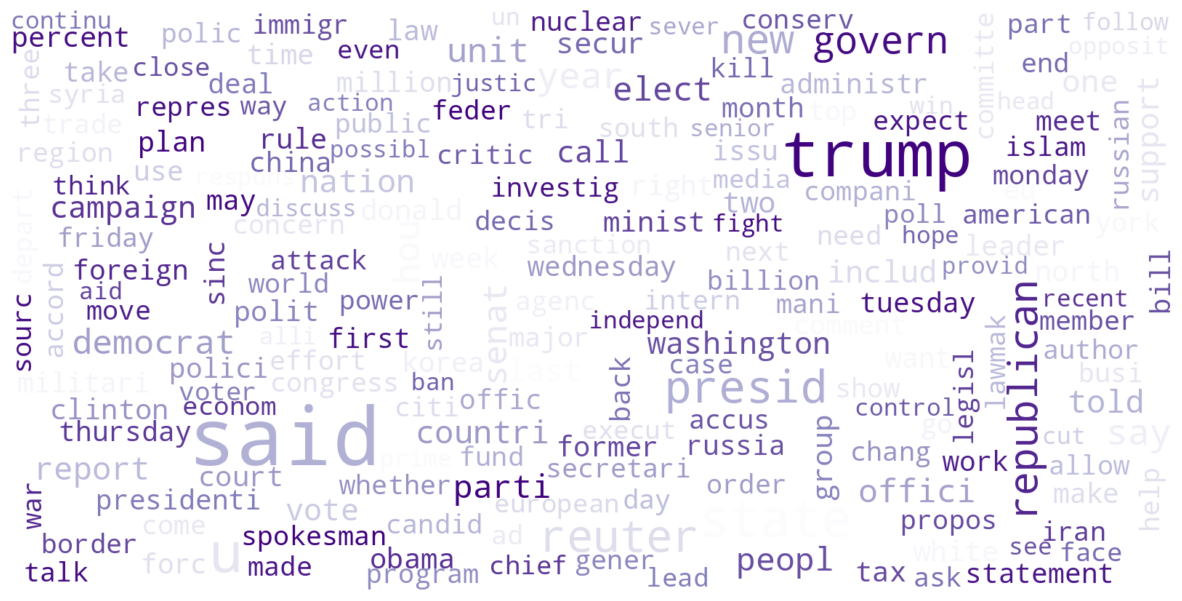

In [ ]:
# Real
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Consolidate text from real news articles
consolidated = ' '.join(
    word for word in data_new['news'][data_new['label'] == 1].astype(str))

# Create a word cloud with white background and 'Blues' colormap
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False,
                      background_color='white',
                      colormap='Purples')

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

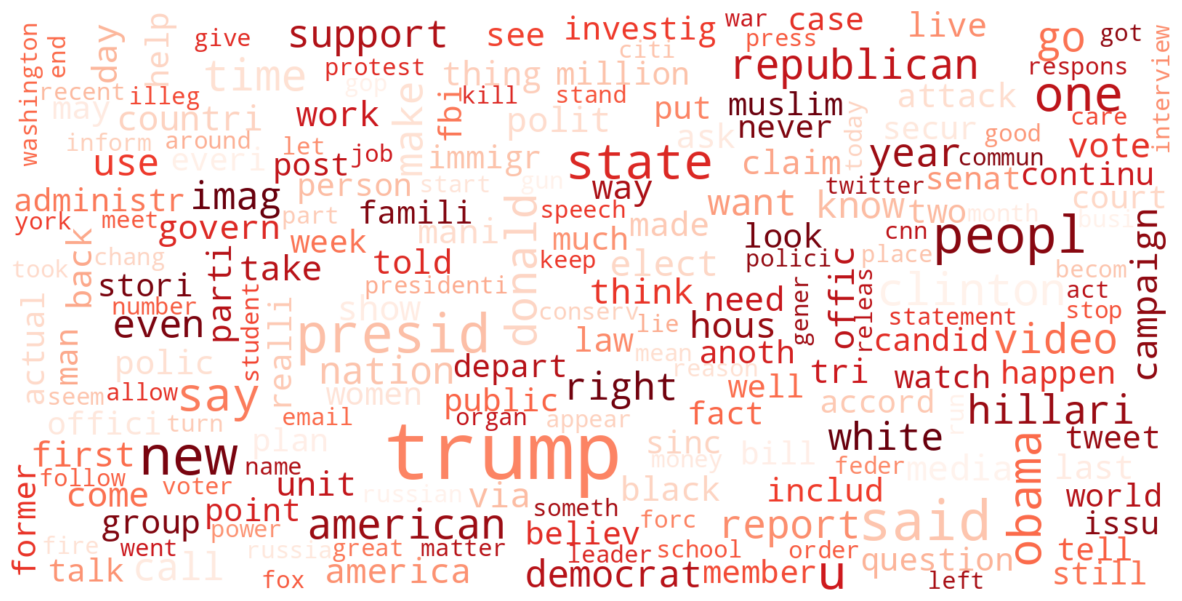

In [ ]:
# Fake

# Consolidate text from real news articles
consolidated = ' '.join(
    word for word in data_new['news'][data_new['label'] == 0].astype(str))

# Create a word cloud with white background and 'Reds' colormap
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False,
                      background_color='white',
                      colormap='Reds')

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

# Feature Extraction: TF-IDF

In [40]:
X = data_new['news']
y = data_new['label']

In [41]:
#TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 10000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

X_tfidf

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify = y,
                                                    random_state=42)

# Modeling: Machine Learning

In [42]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)

# Calculate and print accuracy as a percentage
lr_accuracy = accuracy_score(y_test, y_pred_lr) * 100
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}%")

Logistic Regression Accuracy: 98.74%


In [43]:
# Calculate Precision, Recall, and F1 Score
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1 Score: {lr_f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Precision: 0.99
Recall: 0.99
F1 Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938


Confusion Matrix:
[[4635   61]
 [  52 4190]]


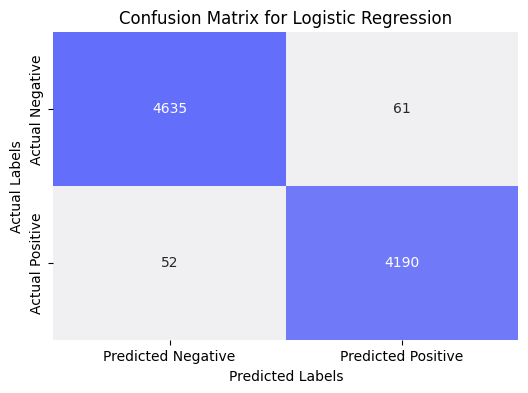

In [44]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Create a heatmap with the specific color
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap=sns.light_palette("#636EFA", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [45]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt) * 100
print(f"Decision Tree Classifier Accuracy: {dt_accuracy:.2f}%")

Decision Tree Classifier Accuracy: 99.51%


In [46]:
# Calculate Precision, Recall, and F1 Score
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall :.2f}")
print(f"F1 Score: {dt_f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Precision: 1.00
Recall: 0.99
F1 Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4696
           1       1.00      0.99      0.99      4242

    accuracy                           1.00      8938
   macro avg       1.00      0.99      1.00      8938
weighted avg       1.00      1.00      1.00      8938


Confusion Matrix:
[[4680   16]
 [  28 4214]]


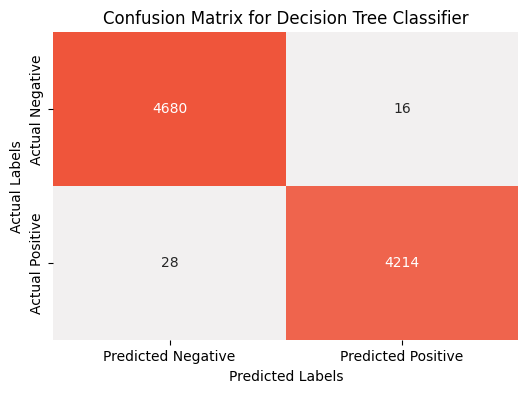

In [47]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Create a heatmap with the specific color
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap=sns.light_palette("#EF553B", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [48]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm) * 100
print(f"Support Vector Machine (SVM) Accuracy: {svm_accuracy:.2f}%")

Support Vector Machine (SVM) Accuracy: 99.36%


In [49]:
# Calculate Precision, Recall, and F1 Score
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1 Score: {svm_f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Precision: 0.99
Recall: 0.99
F1 Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938


Confusion Matrix:
[[4663   33]
 [  24 4218]]


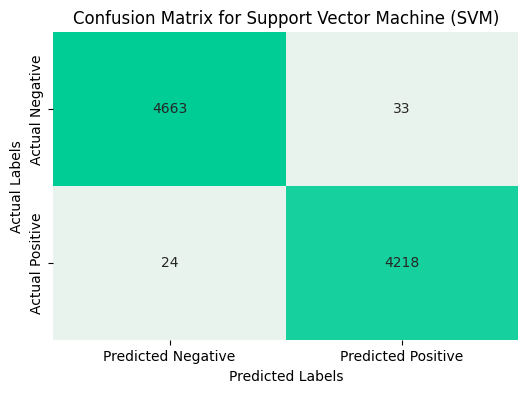

In [50]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Create a heatmap with the specific color
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap=sns.light_palette("#00CC96", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Support Vector Machine (SVM)')
plt.show()

In [51]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb) * 100
print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.2f}%")

Gradient Boosting Classifier Accuracy: 99.41%


In [52]:
# Calculate Precision, Recall, and F1 Score
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Precision: 0.99
Recall: 1.00
F1 Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4696
           1       0.99      1.00      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938


Confusion Matrix:
[[4657   39]
 [  14 4228]]


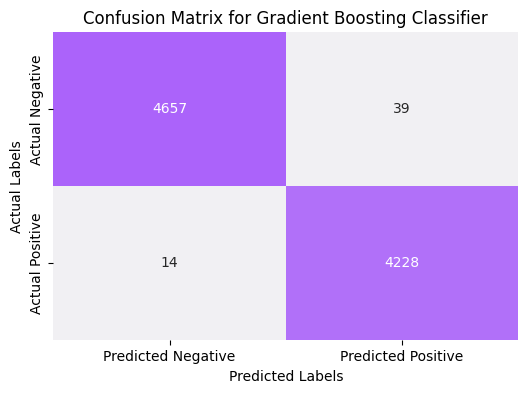

In [53]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Create a heatmap with the specific color
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap=sns.light_palette("#AB63FA", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [54]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb) * 100
print(f"XGBoost Classifier Accuracy: {xgb_accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:33:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Accuracy: 99.69%


In [55]:
# Calculate Precision, Recall, and F1 Score
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

print(f"Precision: {xgb_precision:.2f}")
print(f"Recall: {xgb_precision:.2f}")
print(f"F1 Score: {xgb_f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4242

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938


Confusion Matrix:
[[4679   17]
 [  11 4231]]


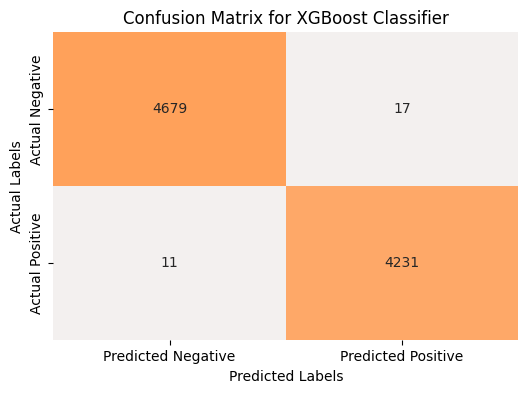

In [56]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap with the specific color
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap=sns.light_palette("#FFA15A", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

In [57]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf) * 100
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.2f}%")

Random Forest Classifier Accuracy: 99.57%


In [58]:
# Calculate Precision, Recall, and F1 Score
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Precision: 1.00
Recall: 0.99
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      0.99      1.00      4242

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938


Confusion Matrix:
[[4681   15]
 [  23 4219]]


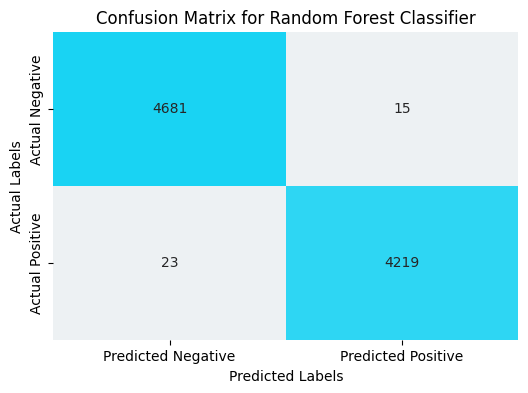

In [59]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap with the specific color
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap=sns.light_palette("#19D3F3", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [60]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

nb_accuracy = accuracy_score(y_test, y_pred_nb) * 100
print(f"Naive Bayes Classifier Accuracy: {nb_accuracy:.2f}%")

Naive Bayes Classifier Accuracy: 93.06%


In [62]:
# Calculate Precision, Recall, and F1 Score
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1 Score: {nb_f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Precision: 0.93
Recall: 0.92
F1 Score: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4696
           1       0.93      0.92      0.93      4242

    accuracy                           0.93      8938
   macro avg       0.93      0.93      0.93      8938
weighted avg       0.93      0.93      0.93      8938


Confusion Matrix:
[[4410  286]
 [ 334 3908]]


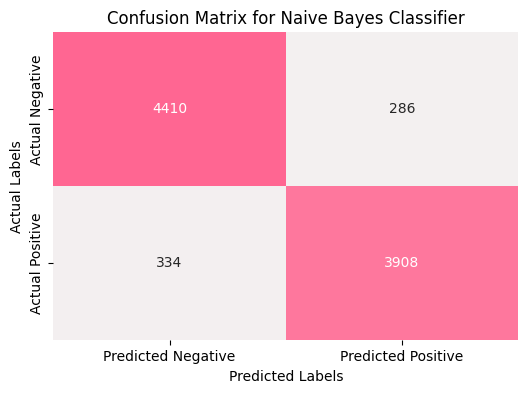

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Create a heatmap with the specific color
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap=sns.light_palette("#FF6692", as_cmap=True),
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

In [64]:
# Create dictionary of accuracies
accuracies = {
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy,
    'Support Vector Machine': svm_accuracy,
    'Gradient Boosting': gb_accuracy,
    'XGBoost': xgb_accuracy,
    'Random Forest': rf_accuracy,
    'Naive Bayes': nb_accuracy
}

In [65]:
# Generate colors using seaborn's Set3 palette and convert to hex
colors = [
    f'#{int(r*255):02X}{int(g*255):02X}{int(b*255):02X}'
    for r, g, b in sns.color_palette("Set3", 7)  # Ensure 7 colors for 7 models
]

fig = go.Figure(
    data=[
        go.Bar(
            x=list(accuracies.keys()),
            y=list(accuracies.values()),
            marker=dict(color=colors)  # Set different colors for each bar
        )
    ],
    layout={
        'title': 'Model Comparison: Accuracy',
        'xaxis': {'title': 'Models'},
        'yaxis': {'title': 'Accuracy (%)'}
    }
)

# Add accuracy annotations above each bar
for model, accuracy in accuracies.items():
    fig.add_annotation(
        x=model,
        y=accuracy,
        text=f'{accuracy:.2f}%',  # Show accuracy with 2 decimal places
        showarrow=False,
        font=dict(size=10),
        xanchor='center',
        yanchor='bottom',
        yshift=5  # Offset for better visibility
    )

fig.show()

In [ ]:
import pandas as pd

# Define output label function
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not Fake News"

# Define manual testing function
def manual_testing(news):
    # Preprocess the input news
    processed_news = preprocess_text(news)

    # Transform the preprocessed text using the fitted TF-IDF vectorizer
    news_vector = tfidf_vectorizer.transform([processed_news])

    # Predictions from all models
    pred_LR = lr_classifier.predict(news_vector)
    pred_DT = dt_classifier.predict(news_vector)
    pred_SVM = svm_classifier.predict(news_vector)
    pred_GBC = gb_classifier.predict(news_vector)
    pred_XGB = xgb_classifier.predict(news_vector)
    pred_RF = rf_classifier.predict(news_vector)
    pred_NB = nb_classifier.predict(news_vector)

    # Print results
    print("\nModel Predictions:")
    print(f"Logistic Regression (LR): {output_label(pred_LR[0])}")
    print(f"Decision Tree (DT): {output_label(pred_DT[0])}")
    print(f"Support Vector Machine (SVM): {output_label(pred_SVM[0])}")
    print(f"Gradient Boosting Classifier (GBC): {output_label(pred_GBC[0])}")
    print(f"XGBoost (XGB): {output_label(pred_XGB[0])}")
    print(f"Random Forest (RF): {output_label(pred_RF[0])}")
    print(f"Naive Bayes (NB): {output_label(pred_NB[0])}")

# Take user input
news = str(input("Enter a news article to test if it's Fake or Not Fake:\n"))
manual_testing(news)

Enter a news article to test if it's Fake or Not Fake:
NASA discovers a new exoplanet with potential signs of life.

Model Predictions:
Logistic Regression (LR): Fake News
Decision Tree (DT): Fake News
Support Vector Machine (SVM): Fake News
Gradient Boosting Classifier (GBC): Fake News
XGBoost (XGB): Fake News
Random Forest (RF): Fake News
Naive Bayes (NB): Fake News


# Feature Extraction: Word2Vec

In [ ]:
# Install libraries if not already installed
!pip install gensim tensorflow

In [ ]:
import gensim
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split

In [ ]:
# Tokenize the data for Word2Vec
tokenized_data = [sentence.split() for sentence in data_new['news']]

# Train a Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Convert words to vectors using Word2Vec
word_vectors = w2v_model.wv

# Prepare the data for the neural network
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_new['news'])
X_seq = tokenizer.texts_to_sequences(data_new['news'])

# Pad sequences to ensure consistent input length
X_padded = pad_sequences(X_seq, maxlen=100)
y = data_new['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Modeling: Deep Learning

In [ ]:
# Define LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Epoch 1/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 398s 686ms/step - accuracy: 0.9073 - loss: 0.2093 - val_accuracy: 0.9787 - val_loss: 0.0614
Epoch 2/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 389s 697ms/step - accuracy: 0.9917 - loss: 0.0277 - val_accuracy: 0.9864 - val_loss: 0.0389
Epoch 3/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 444s 700ms/step - accuracy: 0.9964 - loss: 0.0125 - val_accuracy: 0.9875 - val_loss: 0.0376
Epoch 4/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 414s 650ms/step - accuracy: 0.9977 - loss: 0.0075 - val_accuracy: 0.9858 - val_loss: 0.0488
Epoch 5/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 420s 719ms/step - accuracy: 0.9980 - loss: 0.0067 - val_accuracy: 0.9759 - val_loss: 0.0729


In [ ]:
# Define GRU model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
model_gru.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gru.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 412s 715ms/step - accuracy: 0.8697 - loss: 11.7908 - val_accuracy: 0.9337 - val_loss: 0.1849
Epoch 2/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 375s 671ms/step - accuracy: 0.9626 - loss: 0.1473 - val_accuracy: 0.9396 - val_loss: 0.1604
Epoch 3/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 390s 685ms/step - accuracy: 0.9741 - loss: 0.0836 - val_accuracy: 0.9439 - val_loss: 0.1433
Epoch 4/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 394s 706ms/step - accuracy: 0.9843 - loss: 0.0570 - val_accuracy: 0.9471 - val_loss: 0.1346
Epoch 5/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 424s 675ms/step - accuracy: 0.9904 - loss: 0.0366 - val_accuracy: 0.9499 - val_loss: 0.1304


In [ ]:
# Define 1D CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 233s 412ms/step - accuracy: 0.8774 - loss: 0.2554 - val_accuracy: 0.9856 - val_loss: 0.0445
Epoch 2/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 238s 426ms/step - accuracy: 0.9952 - loss: 0.0167 - val_accuracy: 0.9874 - val_loss: 0.0370
Epoch 3/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 235s 421ms/step - accuracy: 0.9996 - loss: 0.0030 - val_accuracy: 0.9895 - val_loss: 0.0340
Epoch 4/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 237s 424ms/step - accuracy: 1.0000 - loss: 3.9929e-04 - val_accuracy: 0.9894 - val_loss: 0.0355
Epoch 5/5
559/559 ━━━━━━━━━━━━━━━━━━━━ 239s 428ms/step - accuracy: 1.0000 - loss: 1.3501e-04 - val_accuracy: 0.9895 - val_loss: 0.0368


In [ ]:
# Evaluate LSTM model
lstm_score = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {lstm_score[1] * 100:.2f}%")

# Evaluate GRU model
gru_score = model_gru.evaluate(X_test, y_test)
print(f"GRU Accuracy: {gru_score[1] * 100:.2f}%")

# Evaluate CNN model
cnn_score = model_cnn.evaluate(X_test, y_test)
print(f"CNN Accuracy: {cnn_score[1] * 100:.2f}%")

280/280 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9777 - loss: 0.0666
LSTM Accuracy: 97.59%
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9512 - loss: 0.1288
GRU Accuracy: 94.99%
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9897 - loss: 0.0363
CNN Accuracy: 98.95%


In [ ]:
import plotly.graph_objects as go

# Store the accuracies for each model
accuracies = {
    'LSTM': lstm_score[1] * 100,
    'GRU': gru_score[1] * 100,
    'CNN': cnn_score[1] * 100
}

colors = [
    f'#{int(r*255):02X}{int(g*255):02X}{int(b*255):02X}'
    for r, g, b in sns.color_palette("Set3", 7)  # Ensure 7 colors for 7 models
]

# Create a figure for plotting
fig = go.Figure(
    data=[
        go.Bar(
            x=list(accuracies.keys()),
            y=list(accuracies.values()),
            marker=dict(color=colors)  # Apply different colors to each bar
        )
    ],
    layout={
        'title': 'Deep Learning Models Comparison: Accuracy',
        'xaxis': {'title': 'Models'},
        'yaxis': {'title': 'Accuracy (%)'},
        'showlegend': False  # Hide the legend as it's not needed
    }
)

# Add annotations for the accuracies
for model, accuracy in accuracies.items():
    fig.add_annotation(
        x=model,
        y=accuracy,
        text=f'{accuracy:.2f}%',  # Show accuracy with 2 decimal places
        showarrow=False,
        font=dict(size=12),
        xanchor='center',
        yanchor='bottom',
        yshift=10  # Adjust the vertical offset for visibility
    )

# Show the plot
fig.show()

# Topic Modeling: BERTopic

In [ ]:
pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
pip install bertopic sentence-transformers

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [ ]:
def perform_topic_modeling(data, column, model_name="all-MiniLM-L6-v2", top_n_words=10):
    """
    Perform topic modeling using BERTopic.
    Args:
    - data (pd.DataFrame): DataFrame containing text data.
    - column (str): Column name containing the text data.
    - model_name (str): SentenceTransformer model for embedding.
    - top_n_words (int): Number of words to display per topic.

    Returns:
    - topic_model: BERTopic model.
    - topics: List of topic assignments.
    - probs: Probabilities for topic assignments.
    """
    # Extract text
    texts = data[column].tolist()

    # Initialize Sentence Transformer
    sentence_model = SentenceTransformer(model_name)

    # Generate embeddings
    embeddings = sentence_model.encode(texts, show_progress_bar=True)

    # Fit BERTopic model
    topic_model = BERTopic(top_n_words=top_n_words, verbose=True)
    topics, probs = topic_model.fit_transform(texts, embeddings)

    return topic_model, topics, probs

In [ ]:
# Perform topic modeling
topic_model, topics, probs = perform_topic_modeling(data_new, 'news')

# Display topics
print(topic_model.get_topic_info())

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1397 [00:00<?, ?it/s]

2024-12-02 03:30:15,931 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-02 03:31:49,832 - BERTopic - Dimensionality - Completed ✓
2024-12-02 03:31:49,836 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-02 03:31:59,914 - BERTopic - Cluster - Completed ✓
2024-12-02 03:31:59,956 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-02 03:32:15,021 - BERTopic - Representation - Completed ✓


     Topic  Count                                               Name  \
0       -1  13132                     -1_trump_clinton_hillari_white   
1        0    805                  0_obamacar_insur_healthcar_repeal   
2        1    589  1_2017realdonaldtrump_realdonaldtrump_trump_tweet   
3        2    465                        2_korea_north_korean_missil   
4        3    439                     3_sander_berni_vermont_clinton   
..     ...    ...                                                ...   
622    621     10                     621_congo_kabila_ceni_congoles   
623    622     10              622_macedonia_albanian_gruevski_skopj   
624    623     10                    623_hayworth_msnbc_matthew_reid   
625    624     10                      624_starr_brokaw_camarota_ken   
626    625     10                         625_gulf_arab_saudi_riyadh   

                                        Representation  \
0    [trump, clinton, hillari, white, donald, like,...   
1    [obamacar, ins

In [ ]:
# Visualize topic frequencies
topic_model.visualize_topics().show()

In [ ]:
# Visualize the similarity of topics
topic_model.visualize_barchart(top_n_topics=10).show()

In [ ]:
# Visualize term score distribution for a specific topic
topic_model.visualize_term_rank(topics=[0]).show() # Change 'topic' to 'topics' and pass topic 0 as a list

In [ ]:
data_new['topic'] = topics
data_new['topic_probability'] = probs

# Save to CSV for later analysis
data_new.to_csv("bertopic_results.csv", index=False)

In [ ]:
topic_model.reduce_topics(data_new['news'], nr_topics=20)
topic_model.visualize_topics().show()

2024-12-02 03:41:50,612 - BERTopic - Topic reduction - Reducing number of topics
2024-12-02 03:42:05,025 - BERTopic - Topic reduction - Reduced number of topics from 627 to 20
